<a href="https://colab.research.google.com/github/gaheehan/study_AI/blob/main/%EC%98%A4%EB%A5%98_%EB%B0%8F_%EB%88%84%EB%9D%BD_%EB%8D%B0%EC%9D%B4%ED%84%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*이탤릭체 텍스트*

# 오류 및 누락 데이터(모듈17)

 데이터 세트를 사용하기 전에 모든 데이터 세트에 오류와 누락 데이터가 있는지 확인해야 한다.잘못되거나 누락도니 데이터가 있는 경우 데이터 분석은 정확하기 않기 때문에 항상 데이터를 확인하는 것이 중요하다!

노트북을 시작할 때 필요한 모듈을 가져와야 함.
필요한 라이브러리를 불러오자.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

## 1. 오류 데이터

예를 들어 농구 한 팀당 선수 수를 포함하는 데이터 세트가 있는 경우 선수의 수가 음수일 수 없기 때문에 음수 값은 오류 데이터이다.

 이상치는 오류 데이터가 아니라 매우 드문 경우의 유효한 데이터이다. 

 다음 예는 잘못된 데이터와 이상치의 차이점을 보여준다.

### 1.1 컴퓨터 게임 가격

컴퓨터 게임의 가격이 게임을 좋아하는 사람들의 수와 관련이 있는지 여부를 연구하는 과제
 이것은 게임 개발 회사가 최신 게임의 가격을 조정하는 데 도움을 줄 것이다.
 국 달러(USD)로 가격 데이터를 모두 수집하였고, 게임을 좋아한 사람의 숫자도 수집하였다고 가정하면, 이제 데이터에 이상값이나 잘못된 데이터가 포함되어 있는지 확인해야 한다.

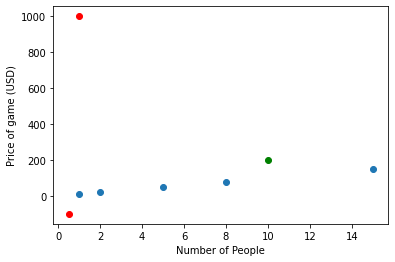

In [2]:
# game_name은 게임의 이름을 나타냅니다.
# game_price는 컴퓨터 게임의 가격을 나타내고 num_people은 게임을 좋아한 사람들의 수를 나타냅니다.
game_name = ['Phone of duty','PIFA soccer','Lario cart','Hokemon','Loom','League of failures','Fritnite','Fatty Trotter']
game_price = [10,20,50,150,80,200,1000,-100]
num_people = [1,2,5,15,8,10,1,0.5]

plt.scatter(num_people[0:5],game_price[0:5])
plt.scatter(num_people[5], game_price[5], c='g')
plt.scatter(num_people[6:8], game_price[6:8], c='r')

plt.xlabel("Number of People")
plt.ylabel("Price of game (USD)")

plt.show()    

빨간색 - 가격이 음수이고 게임을 좋아하는 사람이 0~1명 사이이기 때문에 오류이다. 
가격은 음수일 수x, 사람수도 분수일 수 x. 
두번째로 표시된 점은 컴퓨터 게임이 1000달러 만큼 비싸지 않기 때문에 오류

이러한 값은 제거해야한다. 

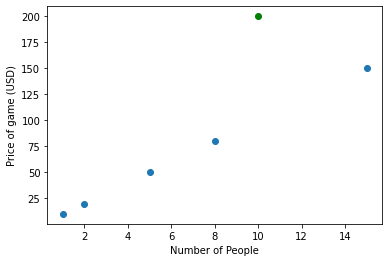

In [5]:
# game_name은 게임의 이름을 나타냅니다.
# game_price는 컴퓨터 게임의 가격을 나타내고 num_people은 게임을 좋아한 사람들의 수를 나타냅니다.
game_name = ['Phone of duty','PIFA soccer','Lario cart','Hokemon','Loom','League of failures','Fritnite','Fatty Trotter']
game_price = [10,20,50,150,80,200]
num_people = [1,2,5,15,8,10,1]

plt.scatter(num_people[0:5],game_price[0:5])
plt.scatter(num_people[5], game_price[5], c='g')

plt.xlabel("Number of People")
plt.ylabel("Price of game (USD)")

plt.show()    

게임 가격과 게임을 좋아한 사람들의 수 사이에 선형 관계가 있는 것으로 보인다. 더 많은 사람이 게임을 좋아할수록 게임의 가격은 더 높아지는 경향을 볼 수 있다.

선형 관계 중에 녹색 점이 맞지않는다. 오류데이터라기 보단 이상치일 가능성이 높다. 

이상치가 하나만 있으므로 제거 후 새로운 산점도를 그려본다.

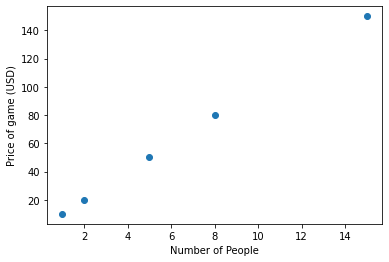

In [6]:
# game_name은 게임의 이름을 나타냅니다.
# game_price는 컴퓨터 게임의 가격을 나타내고 num_people은 게임을 좋아한 사람들의 수를 나타냅니다.
game_name = ['Phone of duty','PIFA soccer','Lario cart','Hokemon','Loom','League of failures','Fritnite','Fatty Trotter']
game_price = [10,20,50,150,80,200]
num_people = [1,2,5,15,8,10,1]

plt.scatter(num_people[0:5],game_price[0:5])

plt.xlabel("Number of People")
plt.ylabel("Price of game (USD)")

plt.show() 

### 1.2 데이터 프레임에서 오류 데이터 처리

학생이 공부한 시간과 수학,영어 및 과학 시험 점수에 대한 데이터 포함되어 있는 csv파일을 불러온다.

학생이 공부에 더 많은 시간을 할애할 때 더 나은 점수를 받아야 한다고 가정. 그러나 연구에 따르면 학생은 하루에 16시간 이상 공부할 수 없다. 또한 일부 데이터가 잘못 되었을 수도 있다. 데이터에서 오류가 확인되면 데이터의 전체 행을 제거해야 한다.

#### 코랩으로 데이터 불러오기

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


먼제 데이터를 데이터 프레임 df로 읽어 온다.

In [28]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/intel 복습/17/Students_Score1.csv")
df.head()

,Student No.,Hours spent studying in a day,Mathematics score,English score,Science score
0,1,11,44,39.6,35.2
1,2,19,76,68.4,60.8
2,3,4,16,14.4,12.8
3,4,24,96,86.4,76.8
4,5,4,16,14.4,12.8


df의 info()출력. 출력된 정보로 데이터 프레임의 열 이름을 이해하고, 누락된 값을 확인할 수 있다.

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 5 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Student No.                    267 non-null    int64  
 1   Hours spent studying in a day  267 non-null    int64  
 2   Mathematics score              267 non-null    int64  
 3   English score                  267 non-null    float64
 4   Science score                  267 non-null    float64
dtypes: float64(2), int64(3)
memory usage: 10.6 KB


Column명 파악 다했당. 오류 데이터를 확인하려면 시간과 점수의 최소값과 최대값을 알아야 한다. 이러한 세부 사항을 알아보기 위해 describe()를 이용하여 정보를 출력한다.

In [30]:
df.describe()

,Student No.,Hours spent studying in a day,Mathematics score,English score,Science score
count,267.000000,267.000000,267.000000,267.000000,267.000000
mean,134.000000,12.123596,48.749064,43.539326,38.795506
std,77.220464,7.668636,31.802503,28.521820,24.539635
min,1.000000,-10.000000,-40.000000,-36.000000,-32.000000
25%,67.500000,6.000000,24.000000,21.600000,19.200000
50%,134.000000,12.000000,48.000000,43.200000,38.400000
75%,200.500000,18.000000,74.000000,66.600000,57.600000
max,267.000000,40.000000,175.000000,144.000000,128.000000


시간,수학 점수,영어 점수,과학 점수 모두 이상치가 있다.

이제 오류가 있는 데이터를 제거해보장!
수학 점수에 대해 작업을 진행. 수학 점수가 0보다 작거나 100보다 작은 큰 행을 제거할 수 있어야 한다.

In [31]:
df2 = df[df['Mathematics score']>= 0]
df3 = df2[df2['Mathematics score']<= 100]
print(df3.describe())
print(df3.info())

       Student No.  Hours spent studying in a day  Mathematics score  \
count   261.000000                     261.000000         261.000000   
mean    135.578544                      12.160920          48.337165   
std      77.120975                       7.442405          29.021102   
min       1.000000                       0.000000           0.000000   
25%      70.000000                       6.000000          24.000000   
50%     137.000000                      12.000000          48.000000   
75%     202.000000                      18.000000          72.000000   
max     267.000000                      40.000000          96.000000   

       English score  Science score  
count     261.000000     261.000000  
mean       43.671264      38.914943  
std        27.756135      23.815696  
min       -15.000000       0.000000  
25%        21.600000      19.200000  
50%        43.200000      38.400000  
75%        64.800000      57.600000  
max       144.000000     128.000000  
<class 'p

수학 점수는 이제 0과 100 사이의 값으로 실제 시험 결과로 가능한 점수이다. 

출력 결과를 데이터 제거 전의 결과와 비교하면 수학 점수 범위가 0에서 96까지 인 것을 알 수 있다.
.info()에서 데이터 포인트 수가 267에서 261로 감소했음을 알 수 있다. 이는 수학 점수에서 6개의 오류가 있음을 나타낸다.

이제 영어 점수, 과학 점수 및 하루 공부 시간 열에서 오류 데이터를 제거할 차례이다.

In [32]:
df4 = df3[df3['English score']>=0]
df5 = df4[df4['English score']<=100]

df6 = df5[df5['Science score']>=0]
df7 = df6[df6['Science score']<=100]

df8 = df7[df7['Hours spent studying in a day']>=0]
df9 = df8[df8['Hours spent studying in a day']<=16]

print(df9.describe())
print(df9.info())

       Student No.  Hours spent studying in a day  Mathematics score  \
count   179.000000                     179.000000         179.000000   
mean    133.536313                       8.189944          32.759777   
std      77.929762                       4.990745          19.962981   
min       1.000000                       0.000000           0.000000   
25%      63.500000                       4.000000          16.000000   
50%     138.000000                       8.000000          32.000000   
75%     199.000000                      12.500000          50.000000   
max     266.000000                      16.000000          64.000000   

       English score  Science score  
count     179.000000     179.000000  
mean       29.483799      26.207821  
std        17.966683      15.970385  
min         0.000000       0.000000  
25%        14.400000      12.800000  
50%        28.800000      25.600000  
75%        45.000000      40.000000  
max        57.600000      51.200000  
<class 'p

위의 표에서 학생의 점수에서 총 88개의 오류 데이터가 있음을 관찰할 수 있다!

수학: 최소:0, 최대:64 영어: 최소:0, 최대:57.6 과학: 최소:0, 최대:51.2

# 2. 누락 데이터 

누락된 데이터는 데이터세트 내의 간격을 나타낸다. 

누락된 데이터는 다양한 형식을 가질 수 있다. 
일반적으로 누락된 데이터는 NaN이라 표현하지만 일부 데이터 세트는 누락된 데이터를 나아내기 위해 매우 큰 숫자 혹은 매우 작은 숫자를 사용.
기상 또는 날씨 데이터에서 -9999 값은 누락된 데이터 값을 나타내는데 사용된다.

분석을 수행하기 전에 데이터 세트에서 이러한 누락된 데이터 값을 제거하거나 교체하는 것이 중요하다. 분석의 정확성을 보장하기 위해서!! 

누락된 값을 식별하고 처리하는 방법을 알아보장

## 2.1 집 가격


데이터는 아래에 나와 있습니다. House_prices는 미국 달러(USD)로 표시된 집의 가격을 나타내고 Num_rooms는 집에 있는 방의 수를 나타냅니다. 코드를 실행하고 출력을 주의 깊게 관찰하십시오!


In [25]:
House_prices = [10050,42300,50206,np.nan,105000,np.nan,22350]
Num_rooms =    [np.nan,4,   5,    6,     10,    12,    2]

print('Total number of data points in House_prices = ',np.count_nonzero(~np.isnan(House_prices)))
print('Total number of data points in Num_rooms = ',np.count_nonzero(~np.isnan(Num_rooms)))

Total number of data points in House_prices =  5
Total number of data points in Num_rooms =  6


**numpy.count_nonzero()**

배열 a 의 0이 아닌 값의 개수를 계산
https://runebook.dev/ko/docs/numpy/reference/generated/numpy.count_nonzero

**numpy.isnan()**
isnan 함수는 데이터가 nan(not a number)인지 아닌지를 판별해주는 함수입니다. nan이면 True를, nan이 아니면 False를 반환합니다.
https://bskyvision.com/entry/python-numpy-%ED%8C%A8%ED%82%A4%EC%A7%80-%EC%9C%A0%EC%9A%A9%ED%95%9C-%ED%95%A8%EC%88%98%EB%93%A4-%EC%A0%95%EB%A6%AC-2%ED%8E%B8



House_prices의 데이터 포인트 수가 Num_rooms의 데이터 포인트 수와 다른 이유는 무엇입니까? 총 몇 채의 집이 있습니까?

컬럼에 모두 누락된 데이터 존재. 총 7개의 집이 있다.

데이터 세트에서 누락된 데이터를 제거하고, 산점도를 그려보자.
축에 레이블을 지정해야함.
누락된 값이 있는 데이터는 모두 제거해야 한다.예를 들어 집값에 누락된 값이 있는 경우 해당하는 방 수도 같이 제거해야 한다.

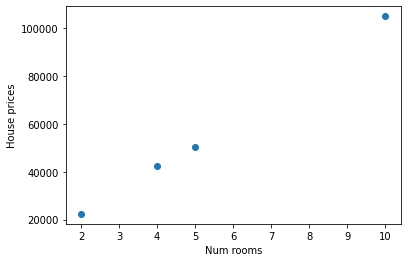

In [27]:
House_prices = [42300,50206,105000,22350]
Num_rooms =    [4,5,10,2]

plt.scatter(Num_rooms[0:4],House_prices[0:4])

plt.xlabel("Num rooms")
plt.ylabel("House prices")

plt.show() 

## 2.2 데이터 프레임에서 누락된 값 처리


In [33]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/intel 복습/17/Students_Score2.csv")

In [34]:
df.head()

,Student No.,Hours spent studying in a day,Mathematics score,English score,Science score
0,1,0.0,0.0,0.0,0.0
1,2,3.0,15.0,12.9,12.6
2,3,2.0,10.0,8.6,8.4
3,4,13.0,65.0,55.9,54.6
4,5,0.0,0.0,0.0,0.0


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 387 entries, 0 to 386
Data columns (total 5 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Student No.                    387 non-null    int64  
 1   Hours spent studying in a day  382 non-null    float64
 2   Mathematics score              383 non-null    float64
 3   English score                  382 non-null    float64
 4   Science score                  383 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 15.2 KB


각 열에 대해 행수가 다른 것을 볼 수 있다. 
Why? 행에 누락된 숫자가 있기 때문!

누락된 값을 처리하기 전에 먼저 잘못된 데이터를 확인해야 한다. describe()를 출력하고 최소값과 최대값을 관찰하자

In [36]:
df.describe()

,Student No.,Hours spent studying in a day,Mathematics score,English score,Science score
count,387.000000,382.000000,383.000000,382.000000,383.000000
mean,194.000000,7.083770,35.417755,30.392670,29.641253
std,111.861522,4.473697,22.271713,19.258215,18.783876
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,97.500000,3.000000,15.000000,12.900000,12.600000
50%,194.000000,7.000000,35.000000,30.100000,29.400000
75%,290.500000,11.000000,55.000000,47.300000,46.200000
max,387.000000,15.000000,75.000000,64.500000,63.000000


이제 공부한 시간이 0에서 15 사이이고 모든 점수도 0에서 100 사이임을 알 수 있다. 이는 데이터 세트에 오류가 없음을 나타낸다.

이제 dropna()를 이용하여 누락된 값을 제거할 것이다.

- 누락된 값이 있는 행을 제거하려면 df.dropna(axis=0)를 호출
- 열을 제거하려면 df.dropna(axis=1)를 호출


https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html

In [37]:
df2 = df.dropna(axis=0)

In [38]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 373 entries, 0 to 386
Data columns (total 5 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Student No.                    373 non-null    int64  
 1   Hours spent studying in a day  373 non-null    float64
 2   Mathematics score              373 non-null    float64
 3   English score                  373 non-null    float64
 4   Science score                  373 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 17.5 KB


이제 모든 열에 대한 행의 숫자가 동일한 것을 확인할 수 있다.

In [45]:
print("데이터가 누락된 학생 수:%d명" %(387-373))

데이터가 누락된 학생 수:14명


<font color=Blue> 데이터 세트가 매우 작을 땐 누락된 값을 대신 평균값 또는 빈도가 높은 다른 값으로 채울 수도 있다.


In [47]:
df3 = df.copy()
print("Before filling in missing values...................")
print(df3.info())
df3['Mathematics score']=df3['Mathematics score'].fillna(df['Mathematics score'].mean())
df3['Hours spent studying in a day']=df3['Hours spent studying in a day'].fillna(df['Hours spent studying in a day'].mean())
df3['English score']=df3['English score'].fillna(df['English score'].mean())
df3['Science score']=df3['Science score'].fillna(df['Science score'].mean())
print("After filling in missing values................")
print(df3.info())

Before filling in missing values...................
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 387 entries, 0 to 386
Data columns (total 5 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Student No.                    387 non-null    int64  
 1   Hours spent studying in a day  382 non-null    float64
 2   Mathematics score              383 non-null    float64
 3   English score                  382 non-null    float64
 4   Science score                  383 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 15.2 KB
None
After filling in missing values................
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 387 entries, 0 to 386
Data columns (total 5 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Student No.                    387 non-null    int64  
 1   Hours spent studying in a day  